# 1. Import Essential Libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers,regularizers
import tensorflow

# 2. Import Dataset

In [2]:
data = pd.read_csv('CC_Default.csv')

## 2.1 Data Profiling

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
print('number of observations:', data.shape[0])
print('number of variables:', data.shape[1])

number of observations: 30000
number of variables: 25


1.2 Provide the descriptive statistics and manipulate data.

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
data.value_counts('default.payment.next.month')

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

## 2.2. Data Investigation: Correlation

<Axes: >

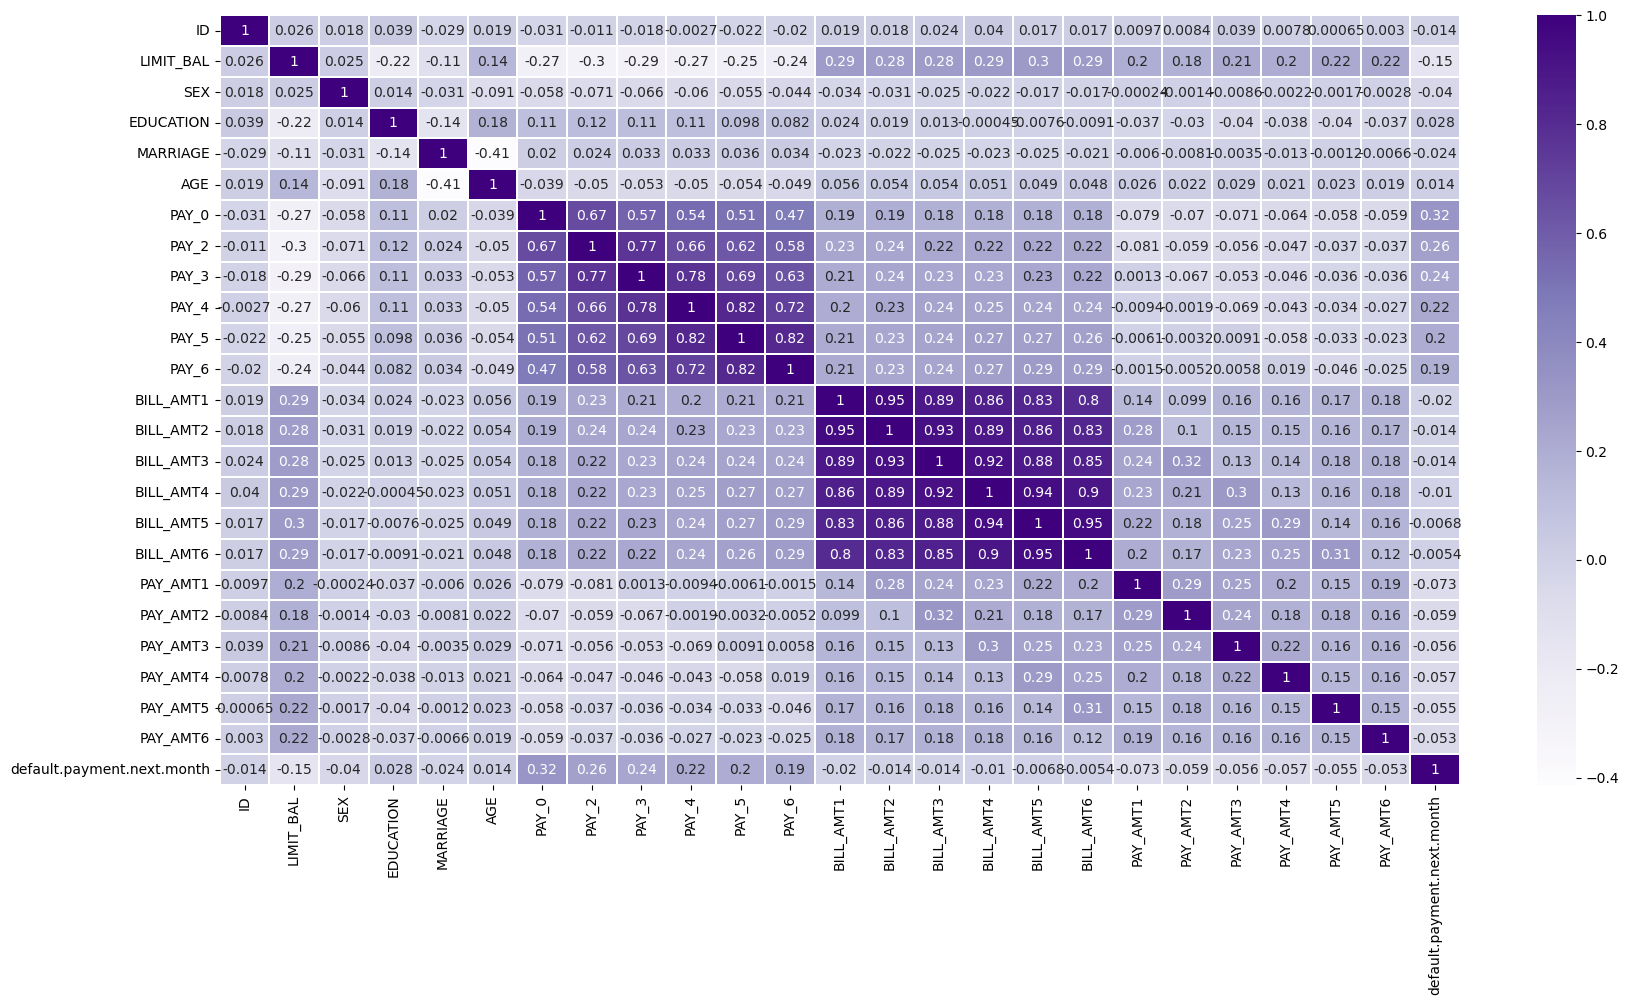

In [8]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, cmap = 'Purples', linewidths = 0.2)

Based on the correlation map,  the independent variable that should help identify those who will default from the next month’s credit card payment is PAY_0, although the relationship is only slightly correlated at 0.32. 

The relationship between independent variables (all variables other than ID and default.payment.next.month) and dependent variable (default.payment.next.month) can be seen in the last row or last column of the heat map above.

The correlations amongst all variables are as per the heat map above where 1 means perfectly correlated, 0 means no correlation, and negative values means negative correlation.

# 3. Train Test Split

In [17]:
data_drop = data.drop(['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_5', 'PAY_6'], axis = 1)
data_drop.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [19]:
X = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] 
y = data[['default.payment.next.month']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [21]:
print('number of observations for X_train:', X_train.shape[0])
print('number of variables for X_train:', X_train.shape[1])
print('number of observations for X_test:', X_test.shape[0])
print('number of variables for X_test:', X_test.shape[1])
print('number of observations for y_train:', y_train.shape[0])
print('number of variables for y_train:', y_train.shape[1])
print('number of observations for y_test:', y_test.shape[0])
print('number of variables for y_test:', y_test.shape[1])

number of observations for X_train: 24000
number of variables for X_train: 16
number of observations for X_test: 6000
number of variables for X_test: 16
number of observations for y_train: 24000
number of variables for y_train: 1
number of observations for y_test: 6000
number of variables for y_test: 1


## 3.1. Preprocessing

In [23]:
y_train = y_train.to_numpy().ravel()
y_train.shape

(24000,)

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

# 4. Modelling: Logistic Regression

In [27]:
clf = LogisticRegression(random_state=1 , penalty='l2' , solver= 'newton-cg', class_weight = 'balanced')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [29]:
X_test = scaler.transform(X_test)

In [31]:
yp = clf.predict(X_test)

## 4.1. Model Validation: Classification Report (Logistic Regression)

In [33]:
print(confusion_matrix(y_test, yp))
print(classification_report(y_test, yp))

[[3327 1336]
 [ 493  844]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      4663
           1       0.39      0.63      0.48      1337

    accuracy                           0.70      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.76      0.70      0.72      6000



## 4.2. Data Visualisation: Confusion Matrix (Logistic Regression)

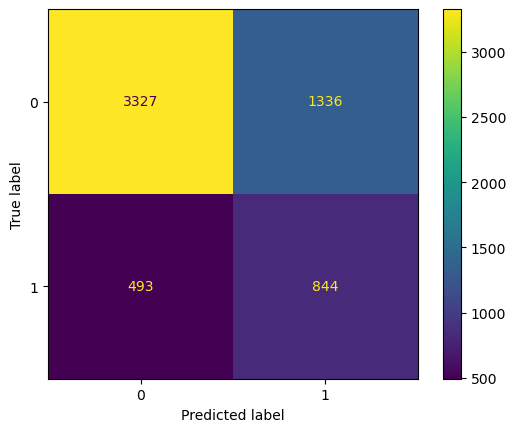

In [35]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['0', '1'])

accuracy: The overall accuracy of this logistic regression is at 0.70 and thus is able to correctly predict if someone is going to default on their payment or not 70% of the time as a whole.

precision: The high precision of the 0 label at 0.87 indicates that the logistic regression is able to predict with high true positives when a person will not default on their payment, but a low precision of the 1 label at 0.39 indicates that the logistic regression is not able to accurately predict when a person is going to default on their payment.

recall: The recall of both labels 1 and 0 are decently high at 0.65 and 0.71 respectively, indicating that the logistic regression is generally accurate at predicting positive responses accurately.

F1: the much lower F1 value of label 1 at 0.48 as compared to label 0 at 0.78 indicates that this regression is not able to accurately classify instances for label 1.

# 5. Modelling: Random Forest Classifier

In [37]:
model = RandomForestClassifier(n_estimators = 1500, random_state = 1, max_features = 3, max_depth = 3)
model.fit(X_train, y_train)
preds = model.predict(X_test) 

## 5.1. Model Validation: Classification Report (Random Forest Classifier)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4663
           1       0.73      0.21      0.33      1337

    accuracy                           0.81      6000
   macro avg       0.77      0.60      0.61      6000
weighted avg       0.79      0.81      0.76      6000



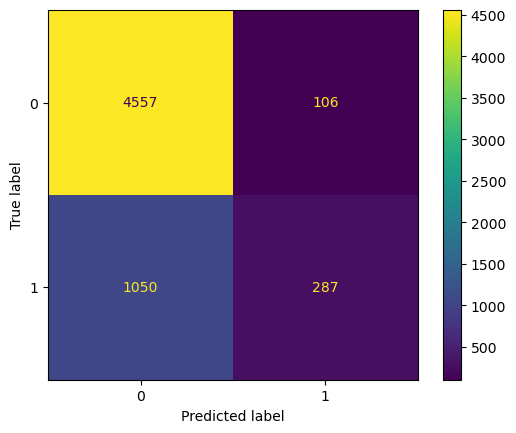

In [38]:
print(metrics.classification_report(y_test, preds))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['0', '1'])

Confusion matrix: The random forest classifier appears to be making much more label 0 predictions and only few label 1 predictions as compared to the logistic regression.

Accuracy: the overall accuracy of the random forest classifier appears to be higher at 0.81 as compared to 0.70 for the logistic regression.

F1: The higher F1 score for label 0 using the random forest classifier at 0.89 as compared to the logistic regression at 0.78 indicates that this model has a much better chance at correctly identifying when a person is not going to default on their payment. Howver, the much lower F1 score for label 1 at 0.33 indicates a lower than chance accuracy of identifying if a person will be defaulting on their payment.

# 6. Modelling: Support Vector Classification (SVC)

In [39]:
clf = svm.SVC(kernel='linear', gamma = 0.025, C = 3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## 6.1. Model Validation: Classification Matrix (SVC)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4663
           1       0.71      0.22      0.34      1337

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000



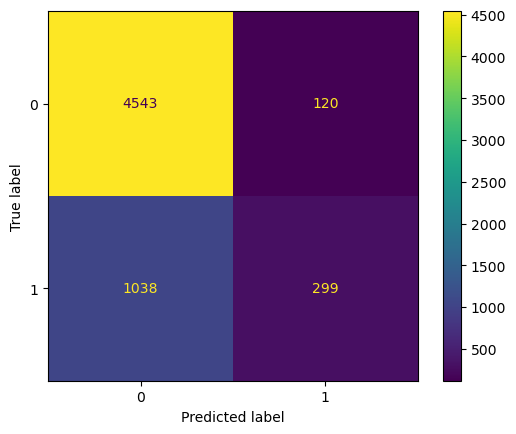

In [40]:
print(metrics.classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['0', '1'])

# 7. Modelling: Artificial Neural Network (ANN) 

## 7.1. Preprocessing (ANN)

In [41]:
X_train = preprocessing.normalize(X_train)

In [42]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [43]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes = 2)

In [44]:
model = Sequential()
model.add(Dense(8, input_shape= (16,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation = 'softmax'))

In [46]:
adam = optimizers.Adam()

In [48]:
model.compile(optimizer = adam, loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 226 (904.00 Byte)
Trainable params: 226 (904.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.fit(X_train, np.array(y_train), batch_size = 15, epochs = 100, verbose = 1)

Epoch 1/100
1600/1600 [==============================] - 1s 563us/step - loss: 0.4959 - accuracy: 0.7787
Epoch 2/100
1600/1600 [==============================] - 1s 553us/step - loss: 0.4529 - accuracy: 0.8069
Epoch 3/100
1600/1600 [==============================] - 1s 554us/step - loss: 0.4428 - accuracy: 0.8148
Epoch 4/100
1600/1600 [==============================] - 1s 550us/step - loss: 0.4403 - accuracy: 0.8164
Epoch 5/100
1600/1600 [==============================] - 1s 551us/step - loss: 0.4389 - accuracy: 0.8179
Epoch 6/100
1600/1600 [==============================] - 1s 555us/step - loss: 0.4380 - accuracy: 0.8172
Epoch 7/100
1600/1600 [==============================] - 1s 552us/step - loss: 0.4373 - accuracy: 0.8175
Epoch 8/100
1600/1600 [==============================] - 1s 549us/step - loss: 0.4367 - accuracy: 0.8178
Epoch 9/100
1600/1600 [==============================] - 1s 548us/step - loss: 0.4362 - accuracy: 0.8175
Epoch 10/100
1600/1600 [==============================]

In [51]:
X_test = preprocessing.normalize(X_test)

In [52]:
results = model.evaluate(X_test, y_test)

188/188 [==============================] - 0s 546us/step - loss: 0.4370 - accuracy: 0.8200


## 7.2. Model Validation: Confusion Matrix (ANN) 

In [53]:
print(model.metrics_names)
print([round(results[0], 2), round(results[1], 2)])

['loss', 'accuracy']
[0.44, 0.82]


In [54]:
Y_pred_cls = model.predict(X_test, verbose = 0) 
YYpred = np.argmax( Y_pred_cls, axis = 1)

In [55]:
YYtest = np.argmax( y_test, axis=1) 

In [56]:
print(metrics.classification_report(YYtest, YYpred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4663
           1       0.68      0.36      0.47      1337

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



[[4442  221]
 [ 859  478]]


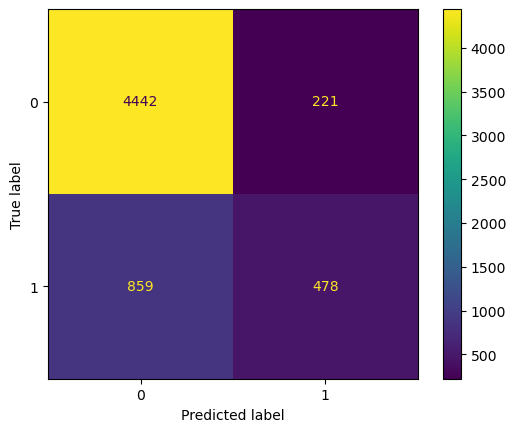

In [57]:
print(metrics.confusion_matrix(YYtest, YYpred))
disp = ConfusionMatrixDisplay(metrics.confusion_matrix(YYtest, YYpred), display_labels = ['0', '1'])
disp.plot()

Accuracy: logistic regression appears to have the lowest accuracy at 0.70 only, whereas the random forest, SVM, and ANN has much higher accuracies of 0.81, 0.80, and 0.82 respectively. Just purely based on accuracy, either random forest, SVM, or ANN can be used as all 3 has similar accuracies.

F1-score: the F1-scores for class labels 0 and 1 are as follows: logistic regression = 0.79 & 0.48 random forest = 0.88 & 0.35 SVM = 0.89 & 0.34 ANN = 0.89 & 0.44. All four models are able to accurately classify instances of when a customer will not default on their payment as all four models have high F1-scores for class labels 0, but all four have a lower than chance capability of identifying when a customer will default on their payment. Of the four models however, the logistic regression and ANN has the highest F1-score for class label 1, indicating that they will have the highest chance of correctly identifying when a customer will default on payment.

Overall: by comparing the overall accuracy and the F1-score, the I will use the ANN model as it has the best combination of accuracy and f1-score allowing for a better chance at correctly identifying if a customer will be defaulting on their payment or not.